In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd

# Introduction to Linear Regression

**OBJECTIVES**

- Derive ordinary least squares models for data
- Evaluate regression models using mean squared error
- Examine errors and assumptions in least squares models
- Use `scikit-learn` to fit regression models to data

## Calculus Refresher

An important idea is that of finding a maximum or minimum of a function.  From calculus, we have the tools required.  Specifically, a maximum or minimum value of a function $f$ occurs wherever $f'(x) = 0$ or is underfined.  Consider the function:

$$f(x) = x^2$$

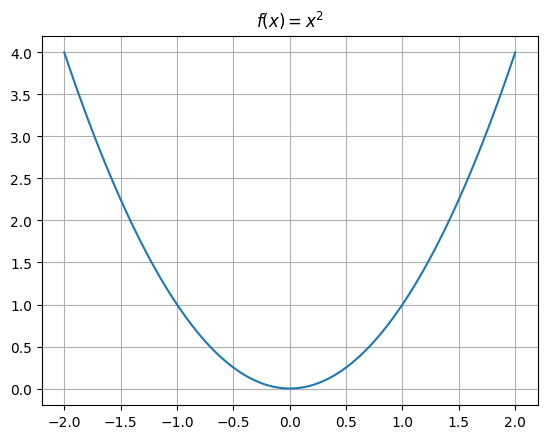

In [2]:
def f(x): return x**2
x = np.linspace(-2, 2, 100)
plt.plot(x, f(x))
plt.grid()
plt.title(r'$f(x) = x^2$');

Here, using our power rule for derivatives of polynomials we have:

$$f'(x) = 2x$$

and are left to solve:

$$0 = 2x$$

or 

$$x = 0$$

**PROBLEM**: Determine where the function $f(x) = (5 - 2x)^2$ has a minimum.

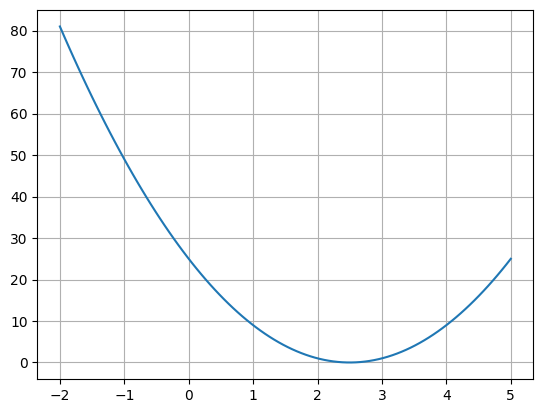

In [3]:
def f(x): return (5 - 2*x)**2
x = np.linspace(-2, 5, 100)
plt.plot(x, f(x))
plt.grid();

#### Using the chain rule

**Example 1**: Line of best fit

In [4]:
import seaborn as sns

In [5]:
tips = sns.load_dataset('tips')

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


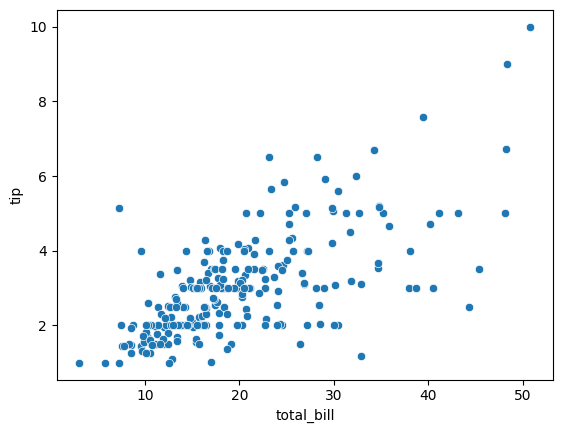

In [7]:
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip');

In [8]:
def y1(x): return .19*x

In [9]:
def y2(x): return .12*x

In [10]:
x = tips['total_bill']

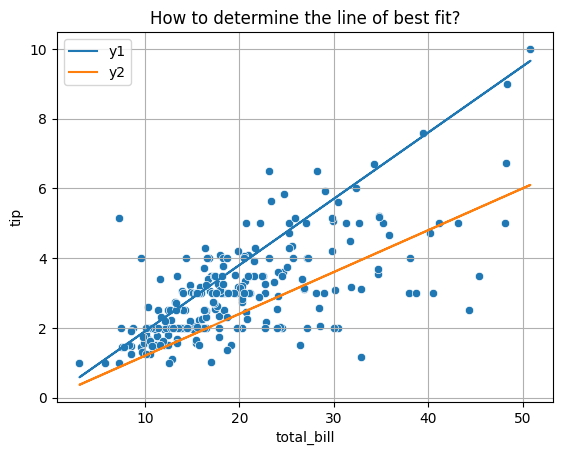

In [11]:
plt.plot(x, y1(x), label = 'y1')
plt.plot(x, y2(x), label = 'y2')
plt.legend()
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip')
plt.title('How to determine the line of best fit?')
plt.grid();

To decide between all possible lines we will examine the error in all these models and select the one that minimizes this error.

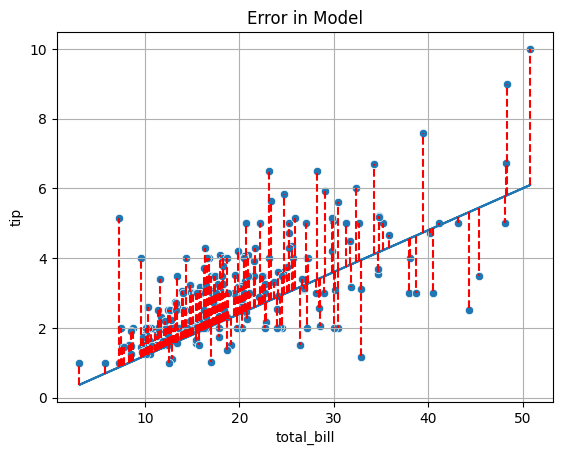

In [12]:
plt.plot(x, y2(x))
for i, yhat in enumerate(y2(x)):
    plt.vlines(x = tips['total_bill'].iloc[i], ymin = yhat, ymax = tips['tip'].iloc[i], color = 'red', linestyle = '--')
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip')
plt.title('Error in Model')
plt.grid();

#### Mean Squared Error

$$\text{MSE}(\beta_0) = \frac{1}{n}\sum_{i = 1}^n (y_i - \beta_0x)^2$$



**OBJECTIVE**: Minimize mean squared error

In [13]:
def mse(beta):
    return np.mean((y - beta*x)**2)

In [14]:
x = tips['total_bill']
y = tips['tip']

In [15]:
mse(.17)

1.502706427336066

In [16]:
for pct in np.linspace(.1, .2, 11):
    print(f'The MSE for slope {pct: .3f} is {mse(pct): .3f}')

The MSE for slope  0.100 is  2.078
The MSE for slope  0.110 is  1.713
The MSE for slope  0.120 is  1.443
The MSE for slope  0.130 is  1.267
The MSE for slope  0.140 is  1.185
The MSE for slope  0.150 is  1.197
The MSE for slope  0.160 is  1.303
The MSE for slope  0.170 is  1.503
The MSE for slope  0.180 is  1.797
The MSE for slope  0.190 is  2.185
The MSE for slope  0.200 is  2.667


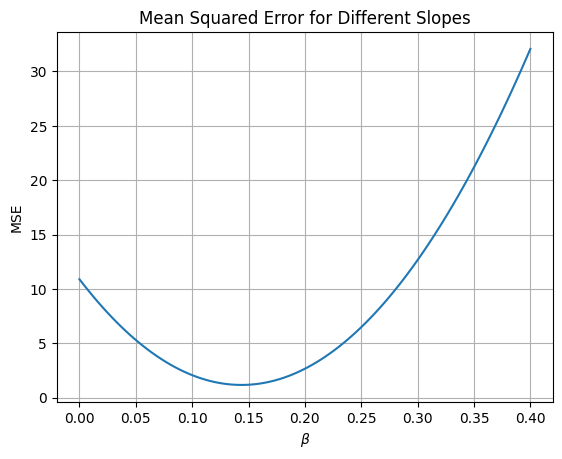

In [17]:
betas = np.linspace(0, .4, 100)
plt.plot(betas, [mse(beta) for beta in betas])
plt.xlabel(r'$\beta$')
plt.ylabel('MSE')
plt.title('Mean Squared Error for Different Slopes')
plt.grid();

#### Using `scipy` 

To find the minimum of our objective function, the `minimize` function from `scipy.optimize` is useful.  This relies on a variety of different optimization algorithms to find the minimum of a function.

In [18]:
from scipy.optimize import minimize

In [19]:
#function to minimize and starting guess
minimize(mse, .1 )

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.1781161154513358
        x: [ 1.437e-01]
      nit: 1
      jac: [ 1.103e-06]
 hess_inv: [[1]]
     nfev: 6
     njev: 3

### Solving the Problem Exactly

From calculus we know that the minimum value for a quadratic will occur where the first derivative equals zero.  Thus, to determine the equations for the line of best fit, we minimize the MSE function with respect to $\beta$.

$$f(\beta) = \frac{1}{n}\sum_{i = 1}^n (y - \beta x)^2$$

$$f'(\beta) = \frac{-2}{n}\sum_{i = 1}^n(y - \beta x) x$$

$$ 0 = \frac{-2}{n}\sum_{i = 1}^n(y - \beta x) x$$

$$0 = \sum_{i = 1}^n(y - \beta x) x$$

$$0 = \sum yx - \sum \beta x^2 $$

$$\sum \beta x^2 = \sum y x$$

$$\beta \sum x^2 = \sum y x$$

$$\beta = \frac{\sum y x}{\sum x^2}$$

In [20]:
np.sum(tips['total_bill']*tips['tip'])/np.sum(tips['total_bill']**2)

0.14373189527721666

### Adding an intercept

Consider the model:

$$y = \beta_0 + \beta_1 x + \epsilon$$

where $\epsilon = N(0, 1)$.

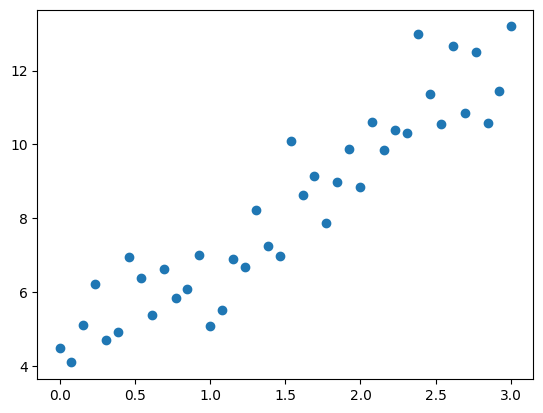

In [21]:
np.random.seed(42)
x = np.linspace(0, 3, 40)
y = 3*x + 4 + np.random.normal(size = len(x))
plt.scatter(x, y)

Now, the objective function changes to be a function in 3-Dimensions where the slope and intercept terms are input and mean squared error is the output.

$$\text{MSE}(\beta_0, \beta_1) = \frac{1}{n}\sum_{i = 1}^n (y - (\beta_0 + \beta_1 x)^2)$$

In [22]:
def mse(betas):
    return np.mean((y - (betas[0] + betas[1]*x))**2)

In [23]:
mse([4, 3])

0.9329508980248764

In [24]:
minimize(mse, [0, 0])

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.829630503231984
        x: [ 4.179e+00  2.735e+00]
      nit: 7
      jac: [ 9.686e-08 -2.235e-08]
 hess_inv: [[ 1.921e+00 -9.483e-01]
            [-9.483e-01  6.327e-01]]
     nfev: 24
     njev: 8

In [25]:
betas = minimize(mse, [0, 0]).x

In [26]:
def lobf(x): return betas[0] + betas[1]*x

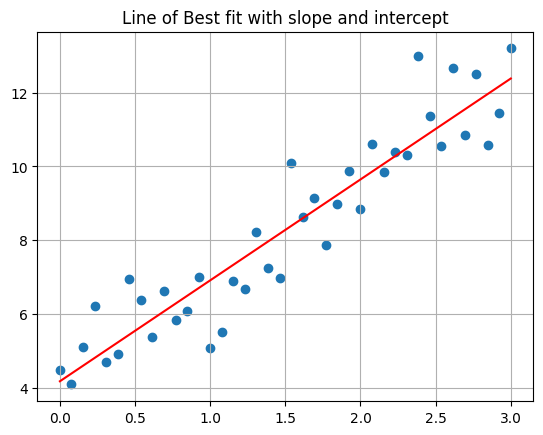

In [27]:
plt.scatter(x, y)
plt.plot(x, lobf(x), color = 'red')
plt.grid()
plt.title('Line of Best fit with slope and intercept');

### Exercise

Use the `minimize` function together with your `mse` function to complete the class below.  After calling the fit method assign the slope of the line of best fit to the `.coef_` attribute and the $y$-intercept to the `.intercept_` attribute.

Test your model on the tips data below.

In [28]:
class LinearReg:
    '''
    This class fits an ordinary lease squares model
    of the form beta_0 + beta_1 * x.
    '''
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def mse(self, betas):
        return np.mean((y - (betas[0] + betas[1]*x))**2)
        
    def fit(self, x, y):
        #betas that minimize
        betas = minimize(self.mse, [0, 0]).x
        #set coef_
        self.coef_ = betas[1]
        #set intercept_
        self.intercept_ = betas[0]
        
    
    def predict(self, x):
        return self.intercept_ + self.coef_*x
    
    

In [29]:
x = tips['total_bill']
y = tips['tip']

In [30]:
#instantiate the model
model = LinearReg()

In [31]:
#fit the model on data
model.fit(x, y)

In [32]:
#make predictions on all data
model.predict(x)

0      2.704636
1      2.006223
2      3.126835
3      3.407250
4      3.502822
         ...   
239    3.969131
240    3.774836
241    3.301175
242    2.791807
243    2.892630
Name: total_bill, Length: 244, dtype: float64

In [33]:
model.coef_

0.10502447914641161

In [34]:
model.intercept_

0.9202703450693733

#### A second example

In [35]:
import statsmodels.api as sm
duncan_prestige = sm.datasets.get_rdataset("Duncan", "carData")
print(duncan_prestige.__doc__)

.. container::

   .. container::

      ====== ===============
      Duncan R Documentation
      ====== ===============

      .. rubric:: Duncan's Occupational Prestige Data
         :name: duncans-occupational-prestige-data

      .. rubric:: Description
         :name: description

      The ``Duncan`` data frame has 45 rows and 4 columns. Data on the
      prestige and other characteristics of 45 U. S. occupations in
      1950.

      .. rubric:: Usage
         :name: usage

      .. code:: R

         Duncan

      .. rubric:: Format
         :name: format

      This data frame contains the following columns:

      type
         Type of occupation. A factor with the following levels:
         ``prof``, professional and managerial; ``wc``, white-collar;
         ``bc``, blue-collar.

      income
         Percentage of occupational incumbents in the 1950 US Census who
         earned $3,500 or more per year (about $36,000 in 2017 US
         dollars).

      education
        

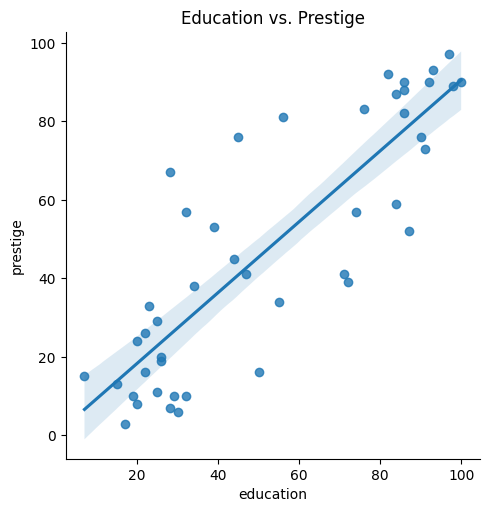

In [36]:
sns.lmplot(duncan_prestige.data, x = 'education', y = 'prestige')
plt.title('Education vs. Prestige');

- Fit a model with an intercept to the data.  
- What is the slope of the line and what does this mean in terms of education and income?
- What is the intercept of the model and what does this mean in terms of education and income?

In [37]:
x = duncan_prestige.data[['education']]
y = duncan_prestige.data['prestige']

In [38]:
x.shape

(45, 1)

In [39]:
# !pip install -U scikit-learn

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
#instantiate -- step 1

In [42]:
#fit it


In [43]:
#make predictions

In [44]:
#slope and intercept

#### Examining Errors in the Model

Once we have a model, it is important to examine the properties of the residuals.  Specifically, we aim to examine the residuals for patterns in error and the overall distribution of these errors.

IndexError: invalid index to scalar variable.

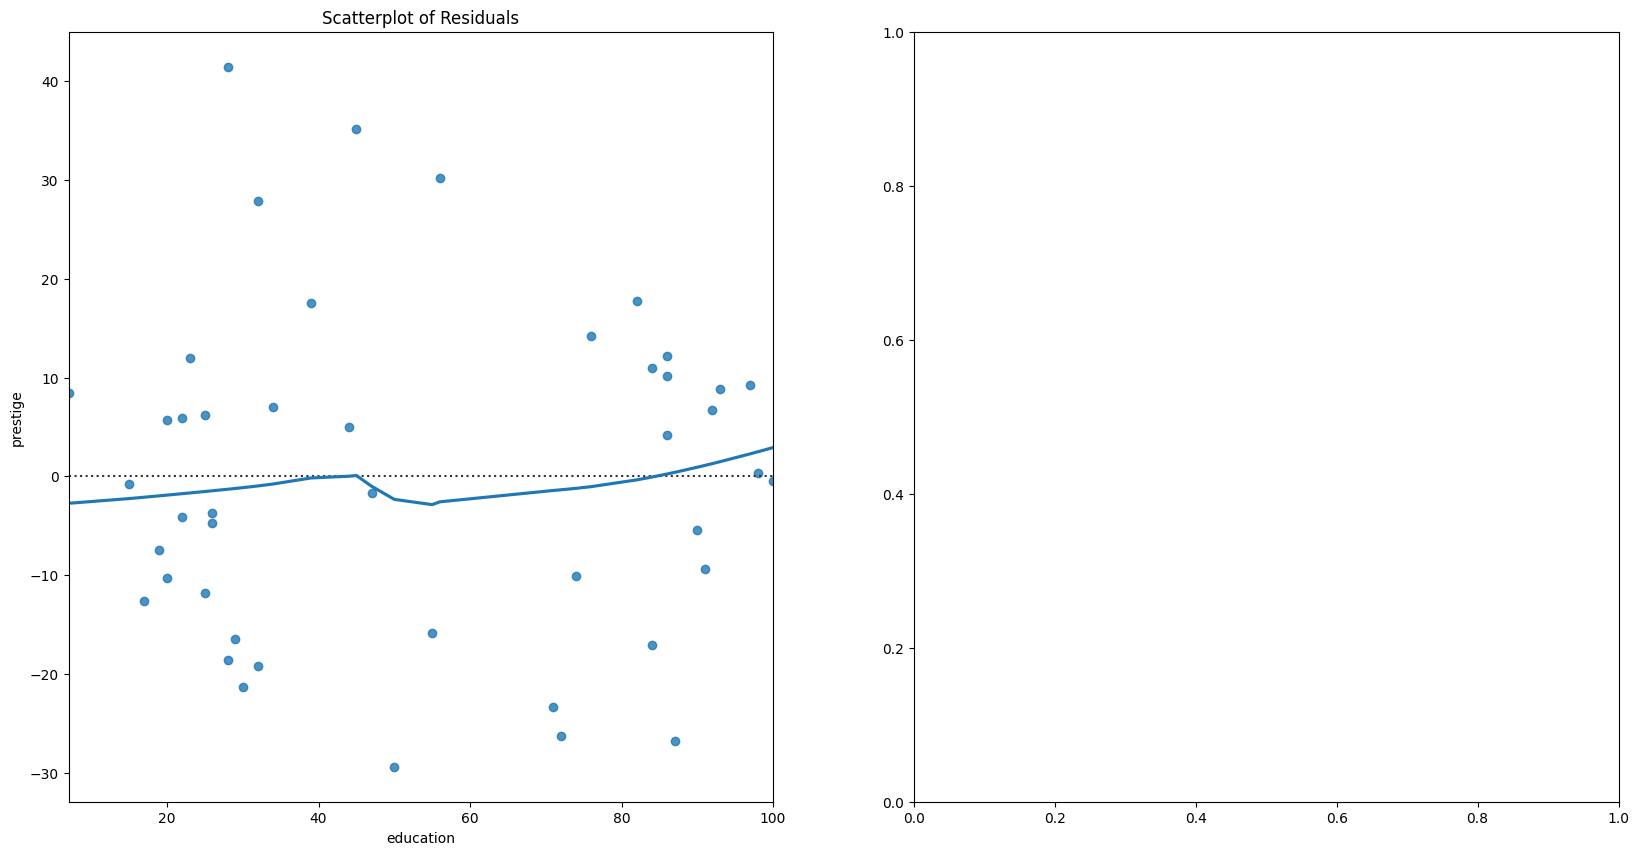

In [45]:
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
sns.residplot(x = x, y = y, ax = ax[0], lowess=True)
ax[0].set_title('Scatterplot of Residuals')
sns.kdeplot((y - (model.intercept_ + model.coef_[0]*x.values[:, 0])), ax = ax[1], fill = True);
ax[1].grid()
ax[1].set_title('Distribution of residuals');

### Using `scikit-learn`

The `scikit-learn` library has many predictive models and modeling tools.  It is a popular library in industry for Machine Learning tasks. [docs](https://scikit-learn.org/stable/index.html)

In [ ]:
# !pip install -U scikit-learn

In [ ]:
credit = pd.read_csv('data/Credit.csv', index_col=0)
credit.head()

In [ ]:
from sklearn.linear_model import LinearRegression

**PROBLEM**: Which feature is the strongest predictor of `Balance` in the data?

In [ ]:
sns.heatmap(credit.corr(numeric_only = True), annot = True)

In [ ]:
X = credit[['Rating']]
y = credit['Balance']

**PROBLEM**: Build a `LinearRegression` model, determine the **Root Mean Squared Error** and interpret the slope and intercept.

In [ ]:
credit_model = LinearRegression()

In [ ]:
credit_model.fit(X, y)

In [ ]:
print(f'The model is y = {credit_model.coef_[0]}x + {credit_model.intercept_}')

**PROBLEM**: Examine the residual plot and histogram of residuals.  Do they look as they should?

In [ ]:
sns.residplot(data = credit, x = X, y = y)

In [ ]:
plt.hist(y - credit_model.predict(X))

#### Other Models

If your goal is more around statistical inference and you want information about things like hypothesis tests on coefficients, the `statsmodels` library is a more classical statistics interface that also contains a variety of regression models.  Below, the `OLS` model is instantiated, fit, and the results summarized with the `.summary()` method.

In [ ]:
import statsmodels.api as sm

In [ ]:
#instantiate the model


In [ ]:
#create the intercept term


In [ ]:
#fit the model


In [ ]:
#summary


Typically, we will use the `scikitlearn` models on our data.  After break will focus on regression models with more features and next class explore how we can build higher degree polynomial models for our data.